Finding the maximum of the compounding interest with fees formula found here: 
https://math.stackexchange.com/a/3967515

In [22]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [23]:
def simulateYear(principal,claimingEvents,apy,fee):
    firstTerm = principal-fee/apy*claimingEvents
    secondTerm = (1+apy/claimingEvents)**claimingEvents
    thirdTerm = fee/apy*claimingEvents
    result = firstTerm*secondTerm+thirdTerm
    return result

In [24]:
vectorizedSimulateYear = np.vectorize(simulateYear)

In [25]:
principal = 880
apy = 0.77
fee = 25
minimumDeltaT=fee/(principal*apy/365)
maximumClaimingEvents = 365/minimumDeltaT
neg_simulateYear = lambda claimingEvents: -1*simulateYear(principal,claimingEvents,apy,fee)
bounded_o = opt.minimize_scalar(neg_simulateYear,bounds=[0.1,maximumClaimingEvents],method="bounded")
print("The ideal number of reinvesting events is:", bounded_o.x)
print("Which is equivalent to claiming every", 365/bounded_o.x,"days")

The ideal number of reinvesting events is: 3.2633919195368706
Which is equivalent to claiming every 111.84681736044733 days


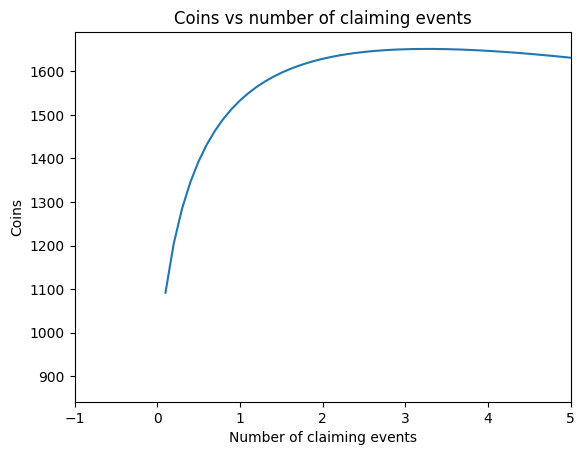

In [26]:
endpoint = maximumClaimingEvents
stepSize = 0.1
x = np.arange(stepSize,endpoint,step=stepSize)
y = vectorizedSimulateYear(principal,x,apy,fee)
plt.plot(x,y)
plt.title("Coins vs number of claiming events")
plt.xlim((-1,5))
plt.xlabel("Number of claiming events")
plt.ylabel("Coins")
plt.show()